In [ ]:
pip install --upgrade numpy

In [1]:
pip install numpy==1.24.5

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement numpy==1.24.5 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.21.2, 1.21.3, 1.21.4, 1.21.5, 1.21.6, 1.22.0, 1.22.1, 1.22.2, 1.22.3, 1.22.4, 1.23.0rc1, 1.23.0rc2, 1.23.0rc3, 1.23.0, 1.23.1, 1.23.2, 1.23.3, 1.23.4, 1.23.5, 1.24.0rc1, 1.24.0rc2, 1.24.0, 1.24.1, 1.24.2, 1.24.3, 1.24.4, 1.25.0rc1, 1.25.0, 1.25.1, 1.25.2, 1.26.0b1, 1.26.0rc1, 1.26.0, 1.26.1, 1.26.2, 1.26.3, 1.26.4, 2.0.0b1, 2.0.0r

In [2]:
pip install --upgrade scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow-probability

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import tensorflow as tf

# Now you can use tf.keras modules, classes, and functions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

In [7]:
pip install tensorflow-probability[tf]

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.7/1.7 MB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install transformers

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 9.0/9.0 MB 1.3 MB/s eta 0:00:00
     -------------------------------------- 287.9/287.9 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 401.2/401.2 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 2.9 MB/s eta 0:00:00
     -------------------------------------- 172.0/172.0 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
from tqdm import tqdm
import json
import numpy as np
import pandas as pd
import torch
import tensorflow.compat.v2 as tf
import tensorflow_probability as tfp
from transformers import BertConfig, AutoTokenizer, TFAutoModelForSequenceClassification
import matplotlib.pyplot as plt

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    tpu = False
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Embedding, SimpleRNN, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [38]:
PATH_TO_TRAIN_DS = "C:/Users/DELL/Documents/Python_projects/Intellihack_Task02/is_train.json"
PATH_TO_VALID_DS = "C:/Users/DELL/Documents/Python_projects/Intellihack_Task02/is_val.json"
PATH_TO_TEST_DS = "C:/Users/DELL/Documents/Python_projects/Intellihack_Task02/is_test.json"

PATH_TO_OOS_DATA = "C:/Users/DELL/Documents/Python_projects/Intellihack_Task02/oos_test.json"


In [39]:
test = np.array(json.load(open(PATH_TO_TEST_DS, 'r')))
train = np.array(json.load(open(PATH_TO_TRAIN_DS, 'r')))
val = np.array(json.load(open(PATH_TO_VALID_DS, 'r')))
oos = np.array(json.load(open(PATH_TO_OOS_DATA, 'r')))

In [40]:
train[:,1]

array(['translate', 'translate', 'translate', ..., 'card_declined',
       'card_declined', 'card_declined'], dtype='<U136')

In [41]:
data_train = pd.DataFrame({
    'text' : train[:,0],
    'label': train[:,1]
})
data_val = pd.DataFrame({
    'text' : val[:,0],
    'label': val[:,1]
})
data_test = pd.DataFrame({
    'text' : test[:,0],
    'label': test[:,1]
})

In [42]:
data_val["text"]

0                in spanish, meet me tomorrow is said how
1                  in french, how do i say, see you later
2                        how do you say hello in japanese
3               how do i ask about the weather in chinese
4               how can i say "cancel my order" in french
                              ...                        
2995    i was at walmart trying to buy toilet paper an...
2996         target declined my card and i don't know why
2997    do you know why my card was declined at target...
2998    i can't figure out why my card was declined at...
2999    i was just at target and they declined my card...
Name: text, Length: 3000, dtype: object

In [44]:
etiquetas = np.sort(np.unique(train[:,1]))
etiqueta_to_id = {label:i for i,label in enumerate(etiquetas)}
id_to_etiqueta = {i:label for i,label in enumerate(etiquetas)}
num_clases = len(etiquetas)
print(f"Numero de clases: {num_clases}")

Numero de clases: 150


In [45]:
id_to_etiqueta[np.random.randint(150)]

'oil_change_when'

In [46]:
# Preprocesamiento de texto
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_train['text'])
sequences = tokenizer.texts_to_sequences(data_train['text'])
max_length = 28
train_sequences = pad_sequences(sequences, padding='post', maxlen=max_length)


# Codificar las etiquetas en valores numéricos enteros
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(data_train['label'])

# Convertir las etiquetas codificadas a codificación one-hot
train_labels = to_categorical(train_labels_encoded, num_clases)

In [48]:
sequences_val = tokenizer.texts_to_sequences(data_val['text'])
val_sequences = pad_sequences(sequences_val, padding='post', maxlen=max_length)

val_labels_encoded = label_encoder.transform(data_val['label'])
val_labels = to_categorical(val_labels_encoded, num_clases)

sequences_test = tokenizer.texts_to_sequences(data_test['text'])
test_sequences = pad_sequences(sequences_test, padding='post',maxlen=max_length)

test_labels_encoded = label_encoder.transform(data_test['label'])
test_labels = to_categorical(test_labels_encoded, num_clases)

In [49]:
len(sequences_val)

3000

In [50]:
len(train_labels), train_labels.shape

(15000, (15000, 150))

In [51]:
# Ajustar la forma de las etiquetas de entrenamiento y validación
train_labels = np.reshape(train_labels, (len(train_labels), 150))
val_labels = np.reshape(val_labels, (len(val_labels), 150))
test_labels = np.reshape(test_labels, (len(test_labels), 150))

In [52]:
val_sequences.shape, val_labels.shape,test_sequences.shape, test_labels.shape,

((3000, 28), (3000, 150), (4500, 28), (4500, 150))

In [53]:
word_index = tokenizer.word_index
vocab_size = len(word_index) +1
max_sequence_length = max(len(sequence) for sequence in train_sequences)
embedding_dim = min(100, vocab_size // 2)

In [54]:
max(len(sequence) for sequence in val_sequences)

28

In [55]:
val_sequences.shape, val_labels.shape,

((3000, 28), (3000, 150))

In [56]:
def grafica_historial(historial):

    # Obtener las métricas de entrenamiento y validación del historial
    training_loss = historial.history['loss']
    validation_loss = historial.history['val_loss']
    training_accuracy = historial.history['accuracy']
    validation_accuracy = historial.history['val_accuracy']

    # Crear un DataFrame de Pandas con las métricas de entrenamiento y validación
    history_df = pd.DataFrame({
        'Training Loss': training_loss,
        'Validation Loss': validation_loss,
        'Training Accuracy': training_accuracy,
        'Validation Accuracy': validation_accuracy
    })

    # Graficar las curvas de pérdida
    plt.figure(figsize=(10, 6))
    plt.plot(history_df['Training Loss'], label='Training Loss')
    plt.plot(history_df['Validation Loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

    # Graficar las curvas de precisión (accuracy)
    plt.figure(figsize=(10, 6))
    plt.plot(history_df['Training Accuracy'], label='Training Accuracy')
    plt.plot(history_df['Validation Accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

### RNN

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.0661 - loss: 4.5375 - val_accuracy: 0.2507 - val_loss: 3.2422
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3822 - loss: 2.7118 - val_accuracy: 0.4377 - val_loss: 2.4070
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5722 - loss: 1.8062 - val_accuracy: 0.4897 - val_loss: 2.1236
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6678 - loss: 1.3681 - val_accuracy: 0.5433 - val_loss: 1.9640
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7233 - loss: 1.1256 - val_accuracy: 0.5793 - val_loss: 1.8445
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7513 - loss: 0.9849 - val_accuracy: 0.6207 - val_loss: 1.7073
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7824 - loss: 0.8403 - val_accuracy: 0.6003 - val_loss: 1.7899
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8127 - loss: 0.7288 - val_accuracy: 0.

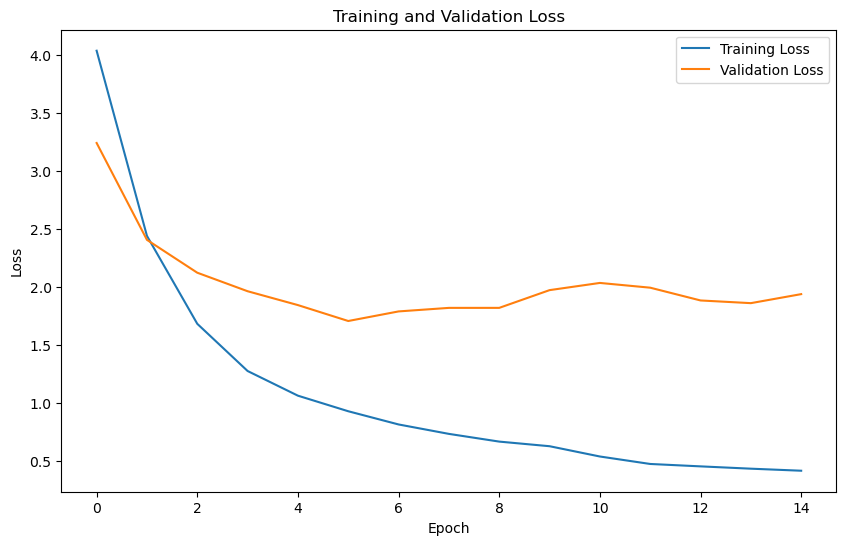

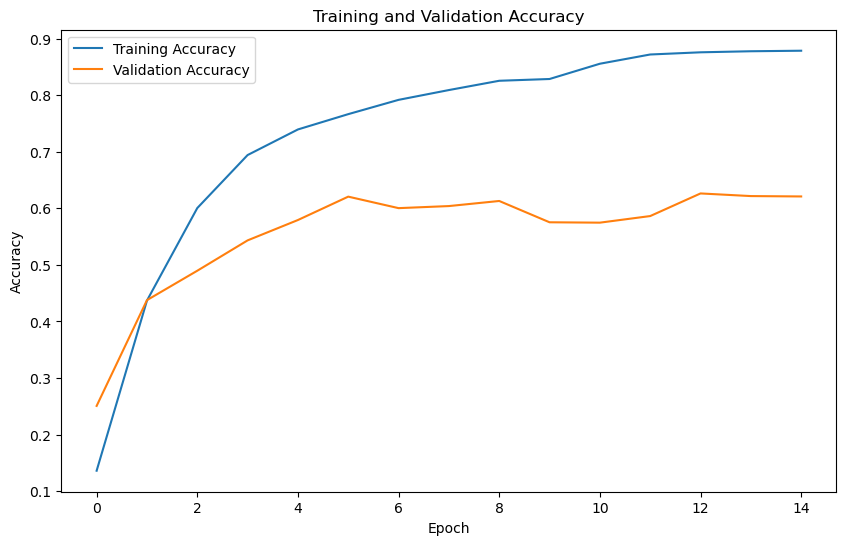

In [59]:
# Definir el modelo de la red neuronal recurrente
model_RNN = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    SimpleRNN(128, input_shape=(train_sequences.shape[1], 1)),
    Dense(num_clases, activation='softmax')
])

# Compilar el modelo
model_RNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Entrenar el modelo
history_RNN = model_RNN.fit(train_sequences, train_labels, epochs=15, validation_data=(val_sequences, val_labels))

# Evaluar el rendimiento del modelo en el conjunto de prueba
loss, accuracy = model_RNN.evaluate(test_sequences, test_labels)
print(f'Loss: {loss}, Accuracy: {accuracy}')
grafica_historial(history_RNN)

### GRU 

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.0063 - loss: 5.0134 - val_accuracy: 0.0067 - val_loss: 5.0122
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.0147 - loss: 4.7911 - val_accuracy: 0.0767 - val_loss: 3.9501
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.0992 - loss: 3.4732 - val_accuracy: 0.1820 - val_loss: 3.0385
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.2388 - loss: 2.6251 - val_accuracy: 0.2887 - val_loss: 2.6932
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.3802 - loss: 2.1089 - val_accuracy: 0.3583 - val_loss: 2.4225
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.4907 - loss: 1.7298 - val_accuracy: 0.4523 - val_loss: 2.2357
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.5935 - loss: 1.4276 - val_accuracy: 0.4980 - val_loss: 2.1388
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.6658 - loss: 1.1978 - val_acc

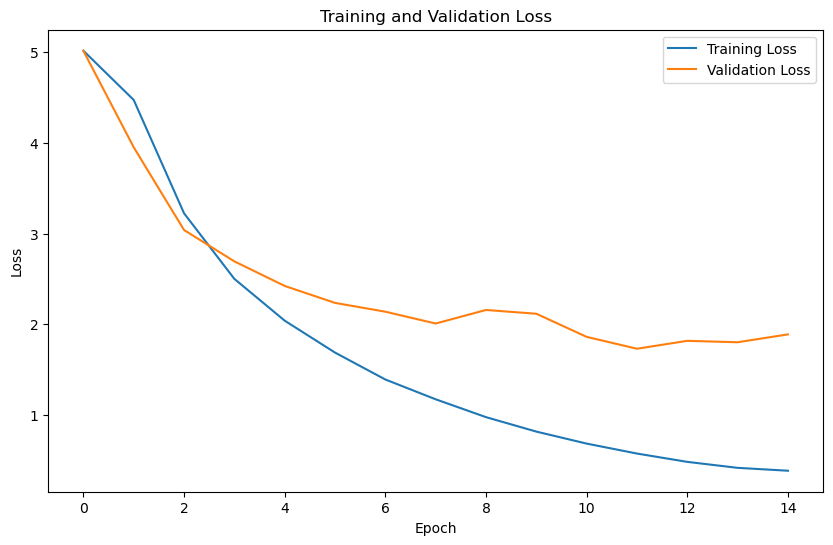

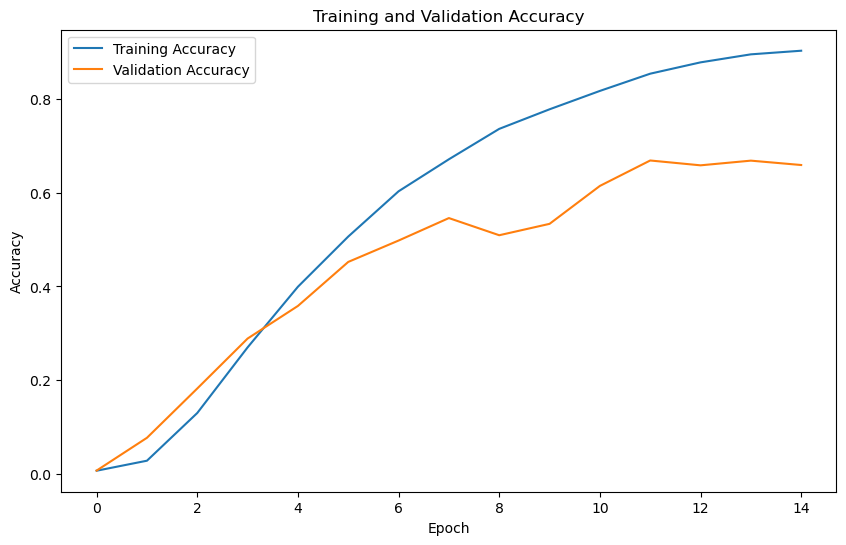

In [61]:
# Definir el modelo de la red neuronal recurrente
model_GRU = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    GRU(128, input_shape=(train_sequences.shape[1], 1)),
    Dense(num_clases, activation='softmax')
])

# Compilar el modelo
model_GRU.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Entrenar el modelo
history_GRU = model_GRU.fit(train_sequences, train_labels, epochs=15, validation_data=(val_sequences, val_labels))

# Evaluar el rendimiento del modelo en el conjunto de prueba
loss, accuracy = model_GRU.evaluate(test_sequences, test_labels)
print(f'Loss: {loss}, Accuracy: {accuracy}')
grafica_historial(history_GRU)

### LSTM 

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.0112 - loss: 4.8708 - val_accuracy: 0.0263 - val_loss: 4.2500
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.0381 - loss: 3.9279 - val_accuracy: 0.0647 - val_loss: 3.6034
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.0970 - loss: 3.2567 - val_accuracy: 0.1910 - val_loss: 2.9326
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.2554 - loss: 2.4831 - val_accuracy: 0.3893 - val_loss: 2.1848
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.4796 - loss: 1.6805 - val_accuracy: 0.5493 - val_loss: 1.6447
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.6587 - loss: 1.1196 - val_accuracy: 0.6363 - val_loss: 1.3924
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.7633 - loss: 0.7899 - val_accuracy: 0.7010 - val_loss: 1.2034
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8294 - loss: 0.5841 - val_accu

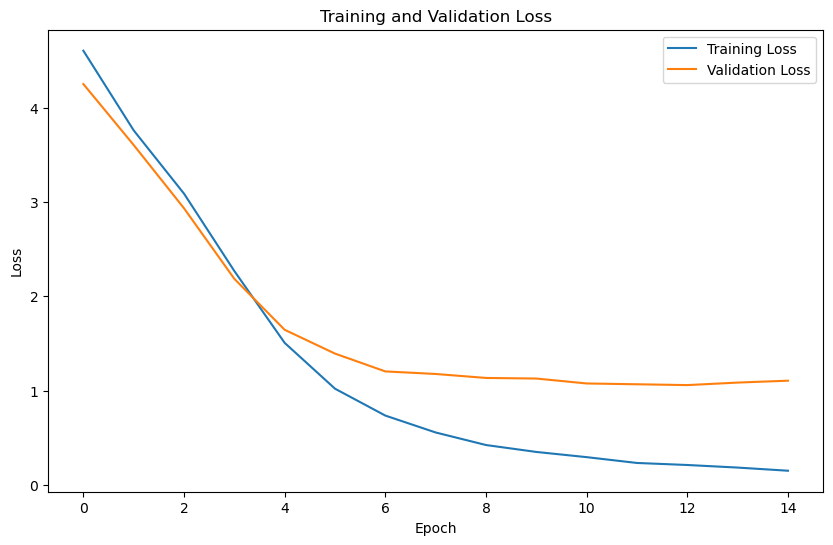

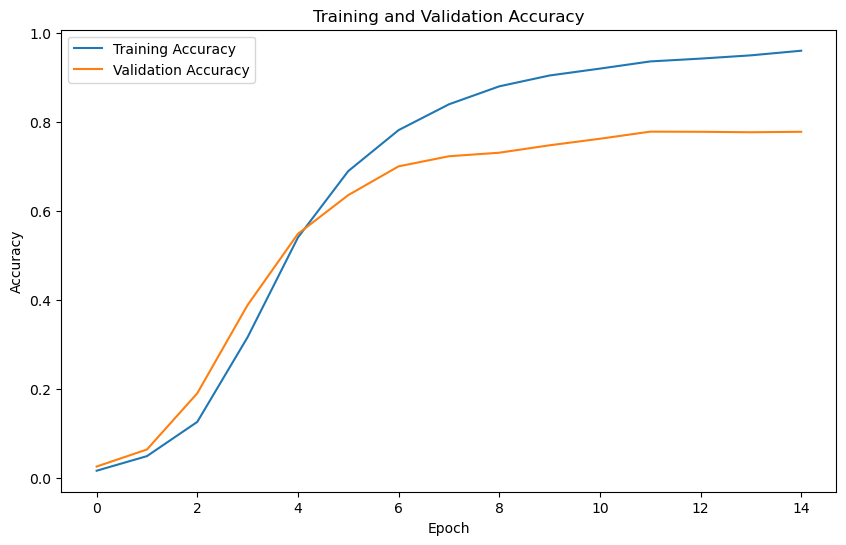

In [62]:
# Definir el modelo de la red neuronal recurrente
model_LSTM = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    LSTM(128, input_shape=(train_sequences.shape[1], 1)),
    Dense(num_clases, activation='softmax')
])

# Compilar el modelo
model_LSTM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Entrenar el modelo
history_LSTM = model_LSTM.fit(train_sequences, train_labels, epochs=15, validation_data=(val_sequences, val_labels))

# Evaluar el rendimiento del modelo en el conjunto de prueba
loss, accuracy = model_LSTM.evaluate(test_sequences, test_labels)
print(f'Loss: {loss}, Accuracy: {accuracy}')
grafica_historial(history_LSTM)

In [12]:
PATH_TO_TRAIN_DS = "../input/outofscope-intent-classification-dataset/is_train.json"
PATH_TO_VALID_DS = "../input/outofscope-intent-classification-dataset/is_val.json"
PATH_TO_TEST_DS = "../input/outofscope-intent-classification-dataset/is_test.json"

PATH_TO_OOS_DATA = "../input/outofscope-intent-classification-dataset/oos_test.json"

tf.random.set_seed(42)